<a href="https://www.kaggle.com/code/jethrovelasco/insurance-premium-predictor-via-linear-regression?scriptVersionId=166822288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv


# Import Dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv')

# Get the Independent and Dependent Variable

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the Variables into Training and Test Data

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Implement Simple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predict the Result

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

# Compare the Actual vs Predicted Value

In [7]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

pred_test_df

,Actual,Predicted
0,27000,29838.461538
1,18000,16665.384615


# Determine the Accuracy using R^2

> 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
> 1 means that the model is perfect and 0 means the the model will perform poorly.

In [8]:
r2_reg_model_test = round(regressor.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.76


# Compute the Mean Absolute Error

In [9]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 2086.538461538463


# Visualizing the Training Set

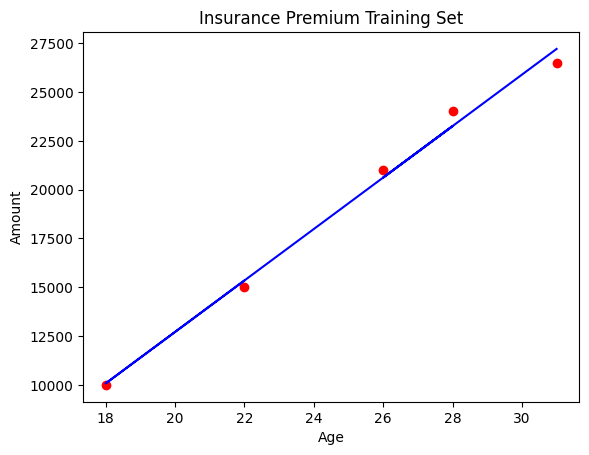

In [10]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Insurance Premium Training Set')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

# Visualizing the Test Set Result

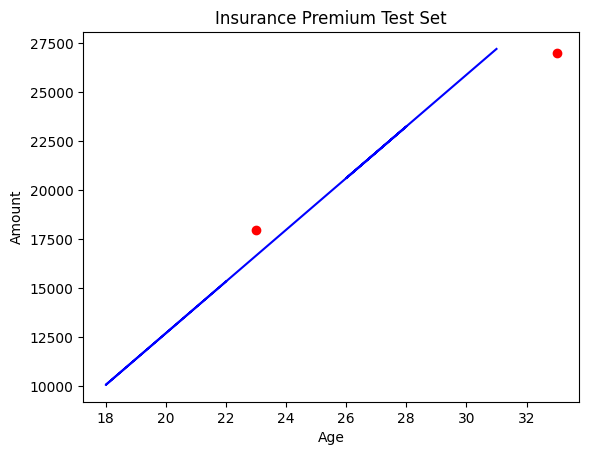

In [11]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Insurance Premium Test Set')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()